# Tracking the size of data through CNN 

### Here, Im trying to build a Convolutional Neural Network(CNN) step by step, and track the size and no. of channels changes after passing each layer.

In [1]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

data_dir = 'PetImages'

transform = transforms.Compose([transforms.Resize(32),
                                transforms.CenterCrop(32),
                                transforms.ToTensor()])
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [2]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    
    return ax

In [3]:
images, labels = next(iter(dataloader))

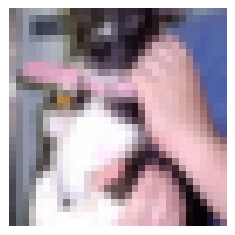

In [4]:
imshow(images[0], normalize=False)

In [5]:
print('Image Size is(batches, num of channels, hight, width): {}'.format(images.shape))

Image Size is(batches, num of channels, hight, width): torch.Size([32, 3, 32, 32])


## 1- One Conv. Layer

With only one conv. layer, the hight and width of output will be the same, but the number of channels will be changed

<img src="diagrams/1.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        # (depth of input, desired output , kernel size)
        self.conv1 = nn.Conv2d(3 , 16 , 3, padding=1)
    def forward(self, x):
        x = F.relu(self.conv1(x))        
        return x

# initialize the NN
model = CNN1()
print(model)

CNN1(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [7]:
Output1 = model.forward(images)
print('The convolutional output when we have only one conv-layer is(batches, channels, hight, width) : {}'
      .format(Output1.shape))

The convolutional output when we have only one conv-layer is(batches, channels, hight, width) : torch.Size([32, 16, 32, 32])


## 2- Adding MaxPool

Maxpool layer will divide the hight and width by its value 

so if we have 2x2 maxpool ---> high/2 , width/2

3x3 ---> high/3 , width/3,  and so on..

<img src="diagrams/2.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [8]:
import torch.nn as nn
import torch.nn.functional as F

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        # (depth of input, desired output , kernel size)
        self.conv1 = nn.Conv2d(3 , 16 , 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = self.pool(x)
        return x

# initialize the NN
model2 = CNN2()
print(model2)

CNN2(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [9]:
Output2 = model2.forward(images)
print('The convolutional output after adding maxpool(batches, channels, hight, width) : {}'
      .format(Output2.shape))

The convolutional output after adding maxpool(batches, channels, hight, width) : torch.Size([32, 16, 16, 16])


## 3- Adding another conv-layer + maxpool

<img src="diagrams/3.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        #(depth of input, desired output , kernel size)
        self.conv1 = nn.Conv2d(3 , 16 , 3, padding=1)
        self.conv2 = nn.Conv2d(16 , 32 , 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = self.pool(x)
        x = F.relu(self.conv2(x))  
        x = self.pool(x)
        return x

# initialize the NN
model3 = CNN3()
print(model3)

CNN3(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [11]:
Output3 = model3.forward(images)
print('The convolutional output with two conv-layers and maxpools(batches, channels, hight, width) : {}'
      .format(Output3.shape))

The convolutional output with two conv-layers and maxpools(batches, channels, hight, width) : torch.Size([32, 32, 8, 8])


## 4- Adding a third Conv. Layer + Maxpool

<img src="diagrams/4.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [12]:
import torch.nn as nn
import torch.nn.functional as F

class CNN4(nn.Module):
    def __init__(self):
        super(CNN4, self).__init__()
        #(depth of input, desired output , kernel size)
        self.conv1 = nn.Conv2d(3 , 16 , 3, padding=1)
        self.conv2 = nn.Conv2d(16 , 32 , 3, padding=1)
        self.conv3 = nn.Conv2d(32 , 64 , 3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)        
    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = self.pool(x)
        x = F.relu(self.conv2(x))  
        x = self.pool(x)
        x = F.relu(self.conv3(x))  
        x = self.pool(x)

        
        return x

# initialize the NN
model4 = CNN4()
print(model4)

CNN4(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [13]:
Output4= model4.forward(images)
print('The convolutional output after adding third layer(batches, channels, hight, width) : {}'
      .format(Output4.shape))

The convolutional output after adding third layer(batches, channels, hight, width) : torch.Size([32, 64, 4, 4])


## 5- Adding a Fully-connected Layer

<img src="diagrams/5.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class CNN5(nn.Module):
    def __init__(self):
        super(CNN5, self).__init__()
        #(depth of input, desired output , kernel size)
        self.conv1 = nn.Conv2d(3 , 16 , 3, padding=1)
        self.conv2 = nn.Conv2d(16 , 32 , 3, padding=1)
        self.conv3 = nn.Conv2d(32 , 64 , 3, padding=1)
        
        self.fc1 = nn.Linear(4*4*64, 500)

        self.pool = nn.MaxPool2d(2, 2)        
    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = self.pool(x)
        x = F.relu(self.conv2(x))  
        x = self.pool(x)
        x = F.relu(self.conv3(x))  
        x = self.pool(x)
        x = x.view(-1, 64 * 4 * 4)

        x= self.fc1(x)

        
        return x

# initialize the NN
model5 = CNN5()
print(model5)

CNN5(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


#### After adding a fully connected layer, the information of all previous layers are dedicated on one 1D layer.

In [15]:
Output5= model5.forward(images)
print('The convolutional output after adding fully connected layer(batches, width) : {}'
      .format(Output5.shape))

The convolutional output after adding fully connected layer(batches, width) : torch.Size([32, 500])


## 6- Adding an Output Layer

<img src="diagrams/6.png"
     alt="Markdown Monster icon"
     style="float: left; margin-right: 10px;" />

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class CNN6(nn.Module):
    def __init__(self):
        super(CNN6, self).__init__()
        #(depth of input, desired output , kernel size)
        self.conv1 = nn.Conv2d(3 , 16 , 3, padding=1)
        self.conv2 = nn.Conv2d(16 , 32 , 3, padding=1)
        self.conv3 = nn.Conv2d(32 , 64 , 3, padding=1)
        
        self.fc1 = nn.Linear(4*4*64, 500)
        
        self.output = nn.Linear(500, 2)


        self.pool = nn.MaxPool2d(2, 2)        
    def forward(self, x):
        x = F.relu(self.conv1(x))  
        x = self.pool(x)
        x = F.relu(self.conv2(x))  
        x = self.pool(x)
        x = F.relu(self.conv3(x))  
        x = self.pool(x)
        x = x.view(-1, 64 * 4 * 4)
        x= F.relu(self.fc1(x))
        x =self.output(x)

        
        return x

# initialize the NN
model6 = CNN6()
print(model6)

CNN6(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (output): Linear(in_features=500, out_features=2, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [17]:
Output6= model6.forward(images)
print('The convolutional output after adding fully connected layer(batches, width) : {}'
      .format(Output6.shape))

The convolutional output after adding fully connected layer(batches, width) : torch.Size([32, 2])
